In [1]:
# Neil Thawani
# Human Learning and How to Optimize It
# Model Human Learner Assignment 1
# Problems, Principles, & Equations for Memory & Fluency
# 7 February 2020

# Murre JMJ, Dros J (2015) Replication and Analysis of Ebbinghaus’ Forgetting Curve. PLoS ONE 10(7): e0120644. doi:10.1371/journal. pone.0120644

# Murre and Dros used multiple studies to validate their findings. These parameter values are based on:
# Ebbinghaus H (1880) Urmanuskript "Ueber das Gedächtniß". Passau: Passavia Universitätsverlag.

# Matthew M. Walsh, Kevin A. Gluck, Glenn Gunzelmann, Tiffany Jastrzembski, Michael Krusmark, Jay I. Myung, Mark A. Pitt & Ran Zhou. Mechanisms underlying the spacing effect in learning: A comparison of three computational models. Journal of Experimental Psychology: General 147 (9):1325-1348 (2018)

# Walsh et al. conducted an analysis of three models of the spacing effect in learning.
# In this code, I reference the ACT-R model:
# Pavlik, P. I., & Anderson, J. R. (2005). Practice and forgetting effects on vocabulary memory: An Activation-based model of the spacing effect. Cognitive Science, 29, 559-586.

### Memory Chain Model

![Memory Chain Model](mcm.png)

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

def mcm(t, myu_1, a_1, myu_2, a_2):
    memory_chain_model = []
    
    for t_value in t:
        forgetting_curve = myu_1 * math.exp(-a_1 * t_value)
        rate_of_consolidation = (myu_1 * myu_2 * (math.exp(-a_2 * t_value) - math.exp(-a_1 * t_value))) / (a_1 - a_2)
        memory_chain_model.append(forgetting_curve + rate_of_consolidation)
        
    return memory_chain_model

def fit_data_and_plot(x, y, title, x_label, y_label):
    plt.plot(x, y, '.')
    
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    return plt

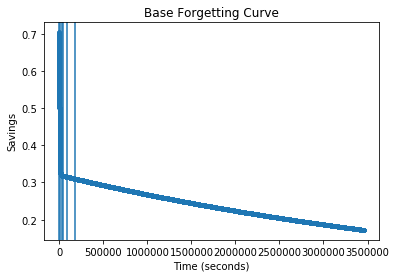

In [3]:
t = []
myu_1 = 0.704 # initial strength of the memory traces in store 1
a_1 = 0.000319 # decay rate in store 1
myu_2 = 0.000145 # rate of consolidating the contents of store 1 to store 2
a_2 = 1.79 * 10**-7 # decay rate in store 2

# unchanging decay rate
# savings: relative amount of time saved on the second learning trial as a result of having had the first
# scalar: days to seconds conversion

scalar = 24 * 60 * 60

# convert 40 days to seconds
total_t = 40 * scalar
t = np.arange(0, total_t + 1, 1)
Qt = mcm(t, myu_1, a_1, myu_2, a_2)
plt = fit_data_and_plot(t, Qt, "Base Forgetting Curve", "Time (seconds)", "Savings")

# savings after ...
# 20 min
plt.axvline(x = 20 * 60)
# 1 hour
plt.axvline(x = 1 * 60 * 60)
# 9 hours
plt.axvline(x = 9 * 60 * 60)
# 1 day
plt.axvline(x = 1 * 24 * 60 * 60)
# 2 days
plt.axvline(x = 2 * 24 * 60 * 60)
# 31 days
plt.axvline(x = 31 * 24 * 60)

plt.show()

### The ACT-R Activation Equation

![Act-R Activation Level](act-r_activation.png)

In [4]:
def activation_of_item(practice_array, decay_rate):
    sum = 0
    
    for i in range(0, len(practice_array)):
        savings = practice_array[i]
        sum += savings
    
    return np.log(sum)

def get_Qt_array_for_practice_times(Qt_forgetting_curve, practice_array):
    Qt_array = []
    
    for i in range(0, len(practice_array)):
        Qt_array.append(Qt_forgetting_curve[practice_array[i]])
    
    return Qt_array

In [5]:
massed_short = np.array([4, 3, 2, 1]) * scalar
B_n = activation_of_item(get_Qt_array_for_practice_times(Qt, massed_short), a_1)
print("Activation of massed practice, short-term retention:", B_n)

spaced_short = np.array([31, 21, 11, 1]) * scalar
B_n = activation_of_item(get_Qt_array_for_practice_times(Qt, spaced_short), a_1)
print("Activation of spcaed practice, short-term retention:", B_n)

massed_long = np.array([13, 12, 11, 10]) * scalar
B_n = activation_of_item(get_Qt_array_for_practice_times(Qt, massed_long), a_1)
print("Activation of massed practice, long-term retention:", B_n)

spaced_long = np.array([40, 30, 20, 10]) * scalar
B_n = activation_of_item(get_Qt_array_for_practice_times(Qt, spaced_long), a_1)
print("Activation of spaced practice, long-term retention:", B_n)

Activation of massed practice, short-term retention: 0.20890684937453183
Activation of spcaed practice, short-term retention: 0.014870465420651156
Activation of massed practice, long-term retention: 0.069716449374198
Activation of spaced practice, long-term retention: -0.12431993457975411
